##### 토큰화 결과를 통해 다양한 분석
2_get_token.ipynb에서 사용한 soynlp의 경우, 따로 형태소를 쪼개서 분류해 처리하고자 하는 용도에 맞지 않아, 추가적으로 다른 라이브러리인 [konlpy](https://github.com/konlpy/konlpy)를 사용해 다시 토큰화하였다.  
konlpy의 형태소 분석기 중, 우선 Okt로 먼저 진행하였다. 토큰화는 7분여만에 종료되었으나, 너무 적게 분류를 했기 때문에 Kkma로 바꿔 시도하였다. 약 2시간이 지난 후 인코딩 에러가 발생해 멈추는 등의 어려움이 있었다. 최종적으로 Okt를 활용하였다.

In [87]:
#pip를 통해 설치함
from konlpy.tag import Okt
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt

In [3]:
#태그 붙여서 형태소 분류하기
okt = Okt()
with open("edited_bible.txt", encoding = 'cp949') as f:
    bible_sentences = [re.sub(r'[\n]','',doc) for doc in f]
bible_morph = [okt.pos(sentences) for sentences in bible_sentences]

In [4]:
with open('edited_judgement.txt', encoding = 'cp949') as f:
    judge_sentences = [re.sub('[,.\n]','',doc) for doc in f] 
judge_morph = [okt.pos(sentences) for sentences in judge_sentences]

In [5]:
with open('edited_twit.txt', encoding = 'utf8') as f:
    twit_sentences = [re.sub('[,.\n]','',doc) for doc in f]
twit_morph = [okt.pos(sentences) for sentences in twit_sentences]

1. 꾸밈말의 빈도 :  
 - Okt가 분류한 명사와 동사가 아닌 것들의 비율(이하 '어미'로 표현)을 서로 비교해보았다.

In [32]:
#성경에 사용된 어미
bible_eomi = {}
#어미가 뭐가 얼마나 들었는지 확인
for i in range(len(bible_morph)):
    for k in range(len(bible_morph[i])):
        #각 형태소를 지정함
        information = bible_morph[i][k]
        #그 형태소가 명사가 아니면
        if 'Noun' not in information and 'Verb' not in information:
            #딕셔너리에 없으면 만들고, 있으면 1 추가
            if information[0] in bible_eomi.keys():
                bible_eomi[information[0]] += 1
            else:
                bible_eomi[information[0]] = 1            

In [35]:
#성경에 사용된 어미
judge_eomi = {}
#어미가 뭐가 얼마나 들었는지 확인
for i in range(len(judge_morph)):
    for k in range(len(judge_morph[i])):
        #각 형태소를 지정함
        information = judge_morph[i][k]
        #그 형태소가 명사가 아니면
        if 'Noun' not in information and 'Verb' not in information:
            #딕셔너리에 없으면 만들고, 있으면 1 추가
            if information[0] in judge_eomi.keys():
                judge_eomi[information[0]] += 1
            else:
                judge_eomi[information[0]] = 1            

In [36]:
#트윗에 사용된 어미
twit_eomi = {}
#어미가 뭐가 얼마나 들었는지 확인
for i in range(len(twit_morph)):
    for k in range(len(twit_morph[i])):
        #각 형태소를 지정함
        information = twit_morph[i][k]
        #그 형태소가 명사가 아니면
        if 'Noun' not in information and 'Verb' not in information:
            #딕셔너리에 없으면 만들고, 있으면 1 추가
            if information[0] in twit_eomi.keys():
                twit_eomi[information[0]] += 1
            else:
                twit_eomi[information[0]] = 1            

In [112]:
#만든 사전을 df로 변경하고 비율을 확인함
bible_eomi_df =  pd.DataFrame(index=range(0,len(bible_eomi)), columns=['Eomi', 'count', 'ratio'])
bible_eomi_df['Eomi'] = bible_eomi.keys()
bible_eomi_df['count'] = bible_eomi.values()
bible_eomi_df['ratio'] = bible_eomi_df['count'] / bible_eomi_df['count'].sum()
bible_eomi_df["Eomi's ratio"] = 1 / len(bible_eomi_df)
bible_eomi_df = bible_eomi_df.sort_values('count', ascending=False)
bible_eomi_df = bible_eomi_df.reset_index(drop=True)
bible_eomi_df

,Eomi,count,ratio,Eomi's ratio
0,을,26706,0.093853,0.000229
1,이,22643,0.079575,0.000229
2,의,20970,0.073695,0.000229
3,에,18289,0.064273,0.000229
4,가,17856,0.062752,0.000229
...,...,...,...,...
4357,은은한,1,0.000004,0.000229
4358,불공평한,1,0.000004,0.000229
4359,사랑스러운지요,1,0.000004,0.000229
4360,쇠약함이여,1,0.000004,0.000229


In [113]:
#만든 사전을 df로 변경하고 비율을 확인함
judge_eomi_df =  pd.DataFrame(index=range(0,len(judge_eomi)), columns=['Eomi', 'count', 'ratio'])
judge_eomi_df['Eomi'] = judge_eomi.keys()
judge_eomi_df['count'] = judge_eomi.values()
judge_eomi_df['ratio'] = judge_eomi_df['count'] / judge_eomi_df['count'].sum()
judge_eomi_df["Eomi's ratio"] = 1 / len(judge_eomi_df)
judge_eomi_df = judge_eomi_df.sort_values('count', ascending=False)
judge_eomi_df = judge_eomi_df.reset_index(drop=True)
judge_eomi_df

,Eomi,count,ratio,Eomi's ratio
0,의,134759,9.763341e-02,0.000165
1,에,118894,8.613916e-02,0.000165
2,을,90262,6.539516e-02,0.000165
3,이,70379,5.098985e-02,0.000165
4,를,55197,3.999044e-02,0.000165
...,...,...,...,...
6068,연결한다,1,7.245038e-07,0.000165
6069,간절한,1,7.245038e-07,0.000165
6070,불확실하지,1,7.245038e-07,0.000165
6071,鍼,1,7.245038e-07,0.000165


In [115]:
#만든 사전을 df로 변경하고 비율을 확인함
twit_eomi_df =  pd.DataFrame(index=range(0,len(twit_eomi)), columns=['Eomi', 'count', 'ratio'])
twit_eomi_df['Eomi'] = twit_eomi.keys()
twit_eomi_df['count'] = twit_eomi.values()
twit_eomi_df['ratio'] = twit_eomi_df['count'] / twit_eomi_df['count'].sum()
twit_eomi_df["Eomi's ratio"] = 1 / len(twit_eomi_df)
twit_eomi_df = twit_eomi_df.sort_values('count', ascending=False)
twit_eomi_df = twit_eomi_df.reset_index(drop=True)
twit_eomi_df

,Eomi,count,ratio,Eomi's ratio
0,을,7064,0.067563,0.000613
1,가,6425,0.061451,0.000613
2,…,5354,0.051208,0.000613
3,에,4663,0.044599,0.000613
4,이,3746,0.035828,0.000613
...,...,...,...,...
1626,많았어,1,0.000010,0.000613
1627,ç,1,0.000010,0.000613
1628,😇💕,1,0.000010,0.000613
1629,기대하겠습니다,1,0.000010,0.000613


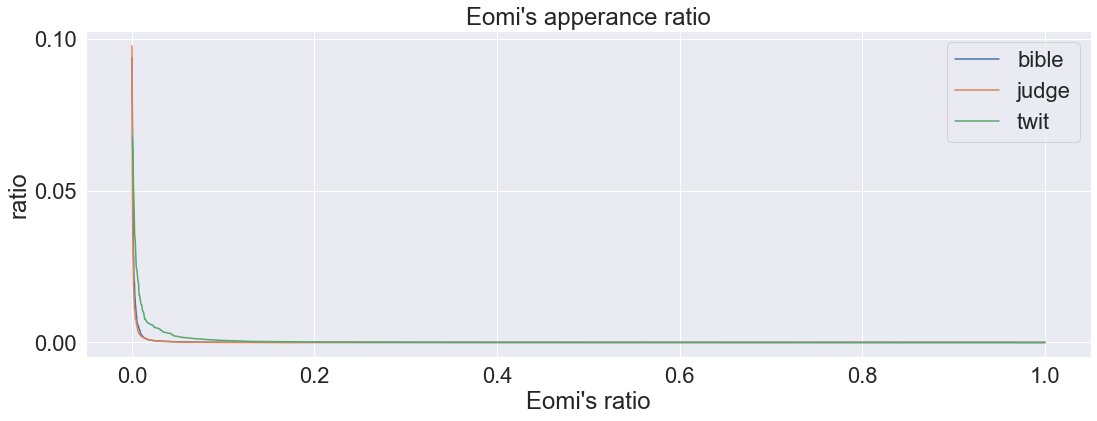

In [131]:
#보기 좋게 그래프로 변환
ax = plt.subplots(figsize=(18, 6))
sns.lineplot(y=bible_eomi_df['ratio'], x=bible_eomi_df["Eomi's ratio"].cumsum(), label='bible', markers=True)
sns.lineplot(y=judge_eomi_df['ratio'], x=judge_eomi_df["Eomi's ratio"].cumsum(), label='judge', markers=True)
sns.lineplot(y=twit_eomi_df['ratio'], x=twit_eomi_df["Eomi's ratio"].cumsum(), label='twit', markers=True)
plt.title("Eomi's apperance ratio")
sns.set(font_scale = 3)
plt.show()

**분석결과**
- 최고 빈도수로 보았을 때, 판결문이 가장 밀집된 어미를 사용했고, 트윗이 가장 분포된 어미를 사용했다.  
    * 판결문은 가장 경직된 어투이며, 트윗이 가장 변화가 심한 어투이다.
- 그래프의 기울기로 보았을 때, 판결문이 성경과 미세한 차이로 가장 가파르고, 트윗이 가장 완만하다.
    * 트위터가 가장 다양한 어미를 사용하며, 판결문이 가장 한정된 어미를 사용한다.
  
결과적으로, 법조문인 판결문이 가장 딱딱하고, 인터넷 유저가 제약없이 쓰는 트윗이 가장 변화무쌍하며, 성경은 특유의 문체가 있어 트윗보단 법조문에 가까운 결과를 보였음을 확인하였다.

2. 명사와 동사의 빈도 :  
 - Okt가 분류한 명사의 사용비율을 서로 비교해보았다. Okt의 경우, 품사 태깅의 경우의 수가 적어 명사 태깅 시 어간도 가져오는 경우가 있어 명사만으로 추출해도 충분히 가치가 있다 판단하였다.

In [136]:
#성경에 사용된 명사
bible_nv = {}
#어미가 뭐가 얼마나 들었는지 확인
for i in range(len(bible_morph)):
    for k in range(len(bible_morph[i])):
        #각 형태소를 지정함
        information = bible_morph[i][k]
        #그 형태소가 명사가 아니면
        if 'Noun' in information:
            #딕셔너리에 없으면 만들고, 있으면 1 추가
            if information[0] in bible_nv.keys():
                bible_nv[information[0]] += 1
            else:
                bible_nv[information[0]] = 1            

In [138]:
#판결문에 사용된 명사
judge_nv = {}
#어미가 뭐가 얼마나 들었는지 확인
for i in range(len(judge_morph)):
    for k in range(len(judge_morph[i])):
        #각 형태소를 지정함
        information = judge_morph[i][k]
        #그 형태소가 명사가 아니면
        if 'Noun' in information:
            #딕셔너리에 없으면 만들고, 있으면 1 추가
            if information[0] in judge_nv.keys():
                judge_nv[information[0]] += 1
            else:
                judge_nv[information[0]] = 1            

In [140]:
#트윗에 사용된 명사
twit_nv = {}
#어미가 뭐가 얼마나 들었는지 확인
for i in range(len(twit_morph)):
    for k in range(len(twit_morph[i])):
        #각 형태소를 지정함
        information = twit_morph[i][k]
        #그 형태소가 명사가 아니면
        if 'Noun' in information:
            #딕셔너리에 없으면 만들고, 있으면 1 추가
            if information[0] in twit_nv.keys():
                twit_nv[information[0]] += 1
            else:
                twit_nv[information[0]] = 1            

In [145]:
#만든 사전을 df로 변경하고 비율을 확인함
bible_noun_df =  pd.DataFrame(index=range(0,len(bible_nv)), columns=['Noun', 'count', 'ratio'])
bible_noun_df['Noun'] = bible_nv.keys()
bible_noun_df['count'] = bible_nv.values()
bible_noun_df['ratio'] = bible_noun_df['count'] / bible_noun_df['count'].sum()
bible_noun_df["Noun's ratio"] = 1 / len(bible_noun_df)
bible_noun_df = bible_noun_df.sort_values('count', ascending=False)
bible_noun_df = bible_noun_df.reset_index(drop=True)
bible_noun_df

,Noun,count,ratio,Noun's ratio
0,그,19965,0.056007,0.000108
1,내,8475,0.023774,0.000108
2,것,8059,0.022607,0.000108
3,여호와,7033,0.019729,0.000108
4,너희,6398,0.017948,0.000108
...,...,...,...,...
9279,에랴십,1,0.000003,0.000108
9280,막나드배,1,0.000003,0.000108
9281,스비내,1,0.000003,0.000108
9282,기슬르월,1,0.000003,0.000108


In [146]:
#만든 사전을 df로 변경하고 비율을 확인함
judge_noun_df =  pd.DataFrame(index=range(0,len(judge_nv)), columns=['Noun', 'count', 'ratio'])
judge_noun_df['Noun'] = judge_nv.keys()
judge_noun_df['count'] = judge_nv.values()
judge_noun_df['ratio'] = judge_noun_df['count'] / judge_noun_df['count'].sum()
judge_noun_df["Noun's ratio"] = 1 / len(judge_noun_df)
judge_noun_df = judge_noun_df.sort_values('count', ascending=False)
judge_noun_df = judge_noun_df.reset_index(drop=True)
judge_noun_df

,Noun,count,ratio,Noun's ratio
0,제,65617,3.526692e-02,0.000057
1,그,41260,2.217586e-02,0.000057
2,것,40941,2.200441e-02,0.000057
3,수,24832,1.334636e-02,0.000057
4,등,23060,1.239397e-02,0.000057
...,...,...,...,...
17669,이펙살,1,5.374662e-07,0.000057
17670,에펙,1,5.374662e-07,0.000057
17671,이펙서,1,5.374662e-07,0.000057
17672,반공,1,5.374662e-07,0.000057


In [147]:
#만든 사전을 df로 변경하고 비율을 확인함
twit_noun_df =  pd.DataFrame(index=range(0,len(twit_nv)), columns=['Noun', 'count', 'ratio'])
twit_noun_df['Noun'] = twit_nv.keys()
twit_noun_df['count'] = twit_nv.values()
twit_noun_df['ratio'] = twit_noun_df['count'] / twit_noun_df['count'].sum()
twit_noun_df["Noun's ratio"] = 1 / len(twit_noun_df)
twit_noun_df = twit_noun_df.sort_values('count', ascending=False)
twit_noun_df = twit_noun_df.reset_index(drop=True)
twit_noun_df

,Noun,count,ratio,Noun's ratio
0,올림픽,18931,0.084967,0.000264
1,선수,6884,0.030897,0.000264
2,쇼트트랙,6456,0.028976,0.000264
3,곽윤기,5754,0.025826,0.000264
4,베이징올림픽,3770,0.016921,0.000264
...,...,...,...,...
3787,약칭,1,0.000004,0.000264
3788,고정,1,0.000004,0.000264
3789,군대,1,0.000004,0.000264
3790,문군,1,0.000004,0.000264


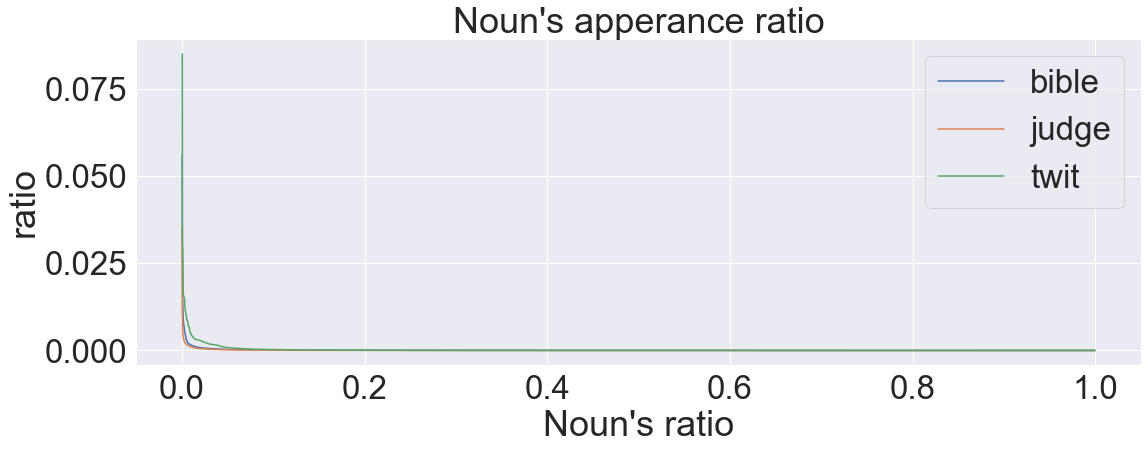

In [148]:
#보기 좋게 그래프로 변환
ax = plt.subplots(figsize=(18, 6))
sns.lineplot(y=bible_noun_df['ratio'], x=bible_noun_df["Noun's ratio"].cumsum(), label='bible', markers=True)
sns.lineplot(y=judge_noun_df['ratio'], x=judge_noun_df["Noun's ratio"].cumsum(), label='judge', markers=True)
sns.lineplot(y=twit_noun_df['ratio'], x=twit_noun_df["Noun's ratio"].cumsum(), label='twit', markers=True)
plt.title("Noun's apperance ratio")
sns.set(font_scale = 3)
plt.show()

**분석결과**
- 최고 빈도수로 보았을 때, 트윗이 가장 밀집된 명사를 사용했고, 판결문이 가장 분포된 명사를 사용했다.  
    * 올림픽을 검색어로 트윗 자료를 수집했기 때문에 많은 경우 올림픽 및 올림픽 관련 명사가 포함되었을 것으로 판단할 수 있다.
    * 판결문은 기술해야 하는 상황에 따라 다양한 명사가 필요하기 때문에 셋 중 가장 낮은 것으로 보인다.
- 그래프의 기울기로 보았을 때, 판결문이 성경과 미세한 차이로 가장 가파르고, 트윗이 가장 완만하다.
    * 트윗이 (올림픽 관련 명사가 많이 들었음에도 불구하고) 가장 다양한 명사를 골고루 사용하는 것으로 밝혀졌다.
    * 판결문은 다양한 단어가 한 문장에서 반복해서 쓰여, 가장 한정된 어미를 사용한다는 결과가 나온 것으로 추정된다.
  
결과적으로, 명사와 어미 모두 트위터가 가장 다양하게 사용되어 가장 변화가 크고, 판결문이 가장 딱딱함을 분석을 통해 확인하였다.

3. 분석의 한계  
- Okt의 한계점으로, 상세한 태깅이 불가능하여 어말어미를 따로 보고자 하는 원래 의도를 실행하지 못해 정확도가 떨어짐.
- '어투가 어떠하다'는 결론을 내리기엔 부족함.